In [19]:
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn.metrics
import os
import sys
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D,
import tensorflow.keras.backend as backend

In [20]:
#Circle = 0
#Square = 1
#Triangle = 2
ytrain = np.array([0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1,
          1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 
          1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 
          2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 
          0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0,
          1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0,
          1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 
          1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 
          0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 
          0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0])
ytest = np.array([2, 1, 2, 0, 1, 2, 0, 1, 1, 0,
         0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 
         1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 
         0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 
         2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
         1, 2, 0, 2, 2, 1, 2, 2, 2, 1])
np.shape(ytrain)

(240,)

In [21]:
trainx = []
testx = []
pathtrain = glob.glob('train/*.jpeg')
pathtest = glob.glob('test/*.jpeg')
for img in pathtrain:
    n = skimage.util.invert(skimage.color.rgb2gray(cv.imread(img)))
    trainx.append(n)
for img in pathtest:
    n = skimage.util.invert(skimage.color.rgb2gray(cv.imread(img)))
    testx.append(n)
trainx = np.array(trainx)
testx = np.array(testx)
np.shape(trainx)

(240, 28, 28)

In [22]:
trainx = trainx.reshape((trainx.shape[0], trainx.shape[1], trainx.shape[2], 1))
testx = testx.reshape((testx.shape[0],testx.shape[1],testx.shape[2],1))
np.shape(trainx)

(240, 28, 28, 1)

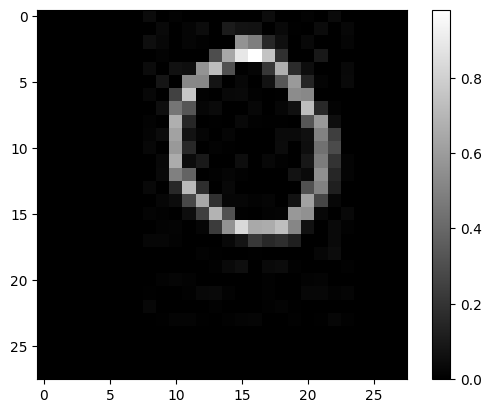

In [23]:
plt.imshow(trainx[8], cmap = 'gray')
plt.colorbar()
plt.show()

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\PKHR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
trainx = trainx.astype('float32')
testx = testx.astype('float32')
type(trainx[0])

numpy.ndarray

In [26]:
accuracy = []
loss = []
loss_t = []
acc_t = []
for i in range(15):
    model.fit(trainx , ytrain, epochs=i)
    acc_t.append(model.evaluate(trainx, ytrain)[1])
    loss_t.append(model.evaluate(trainx, ytrain)[0])
    accuracy.append(model.evaluate(testx, ytest)[1])
    loss.append(model.evaluate(testx, ytest)[0])
    backend.clear_session()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0050 - loss: 2.3307      
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0050 - loss: 2.3307     
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 2.3392 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 2.3392 
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2326 - loss: 1.9530    
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.1556 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.1556 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3257 - loss: 1.2309 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3257 - loss: 1.2309 
Epoch 1/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3925 - loss: 1.1091
Epoch 2/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4834 - loss: 1.0321
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4593 - loss: 0.9857 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4593 - loss: 0.9857 
2/2 ━━━━━━━━━━━━━━━━━━━

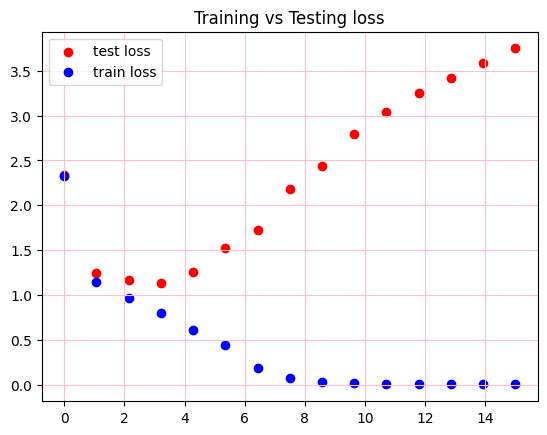

In [30]:
epochs = np.linspace(0, 15, 15)
plt.scatter(epochs, loss, color = 'red', label = 'test loss')
plt.scatter(epochs, loss_t, color = 'blue', label = 'train loss')
plt.grid(color = 'pink')
plt.title('Training vs Testing loss')
plt.legend()
plt.show()

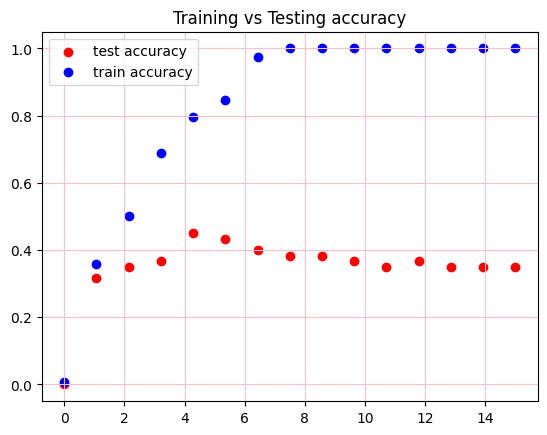

In [31]:
plt.scatter(epochs, accuracy, color = 'red', label = 'test accuracy')
plt.scatter(epochs, acc_t, color = 'blue', label = 'train accuracy')
plt.grid(color = 'pink')
plt.title('Training vs Testing accuracy')
plt.legend()
plt.show()